In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
train = pd.read_csv('train.csv').drop(columns=['SAMPLE_ID'])
test = pd.read_csv('test.csv').drop(columns=['SAMPLE_ID'])

In [2]:
train.shape, test.shape

((367441, 26), (244989, 25))

In [ ]:
# GT, DEADWEIGHT ,DEPTH, BREADTH 의 상관도가 꽤 높음 -> 이 중 어떤 컬럼들은 삭제
# 'DUBAI', 'BRENT', 'WTI' 의 상관도도 꽤 높아서 어떤 컬럼들 삭제
# train.drop(['GT', 'DEPTH', 'BREADTH', 'DRAUGHT','LENGTH','DUBAI', 'BRENT'], axis=1, inplace=True)

In [4]:
# 수치형 컬럼으로만 이루어진 dataframe 생성
num_columns = train._get_numeric_data().columns.tolist()
train_num = train.loc[:, num_columns]
train_num.head()

,DIST,BREADTH,BUILT,DEADWEIGHT,DEPTH,DRAUGHT,GT,LENGTH,U_WIND,V_WIND,AIR_TEMPERATURE,BN,ATA_LT,DUBAI,BRENT,WTI,BDI_ADJ,PORT_SIZE,CI_HOUR
0,30.736578,30.0,28,73100,20.0,10.0,38600,220.0,0.14,3.77,15.9,2.730798,12,42.01,43.16,40.96,1407.668330,0.001660,3.048333
1,63.220425,30.0,15,37900,20.0,10.0,28100,220.0,-3.16,-6.72,24.5,4.289058,10,67.53,64.55,59.34,2089.046774,0.001614,17.138611
2,90.427421,50.0,7,115000,20.0,10.0,96400,300.0,0.00,0.00,9.4,0.000000,14,65.30,66.39,56.94,603.193047,0.001743,98.827500
3,0.000000,10.0,33,1490,10.0,0.0,700,70.0,4.34,-7.31,22.1,4.693735,7,43.02,43.15,41.11,1169.853455,0.000069,0.000000
4,8.813725,30.0,10,27600,10.0,10.0,19300,180.0,1.92,2.31,22.8,2.345875,14,90.45,93.65,88.11,1107.944894,0.000197,96.030556


In [23]:
len(num_columns)

19

In [6]:
# robustscaler 스케일링(수치형 컬럼에 대해서만)
import sklearn
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
train_robust = scaler.fit_transform(train_num)

In [7]:
train_robust = pd.DataFrame(X_train_robust, columns=num_columns)
train_robust.head()

,DIST,BREADTH,BUILT,DEADWEIGHT,DEPTH,DRAUGHT,GT,LENGTH,U_WIND,V_WIND,AIR_TEMPERATURE,BN,ATA_LT,DUBAI,BRENT,WTI,BDI_ADJ,PORT_SIZE,CI_HOUR
0,0.926579,0.0,1.875,0.383582,0.0,0.0,0.187648,0.272727,0.073171,0.880841,-0.395833,0.064356,0.0,-0.778853,-0.770833,-0.702202,0.266898,0.753053,-0.099711
1,2.190883,0.0,0.250,-0.141791,0.0,0.0,-0.061758,0.272727,-0.821138,-1.570093,0.201389,0.953916,-0.2,0.171258,-0.002514,0.007725,1.093174,0.721753,0.186949
2,3.249807,1.0,-0.750,1.008955,0.0,0.0,1.560570,1.000000,0.035230,0.000000,-0.847222,-1.494566,0.2,0.088235,0.063578,-0.084975,-0.708651,0.809177,1.848869
3,-0.269720,-1.0,2.500,-0.685224,-1.0,-10.0,-0.712589,-1.090909,1.211382,-1.707944,0.034722,1.184932,-0.5,-0.741251,-0.771193,-0.696408,-0.021489,-0.327802,-0.161727
4,0.073319,0.0,-0.375,-0.295522,-1.0,0.0,-0.270784,-0.090909,0.555556,0.539720,0.083333,-0.155384,0.2,1.024572,1.042744,1.118965,-0.096562,-0.241270,1.791966


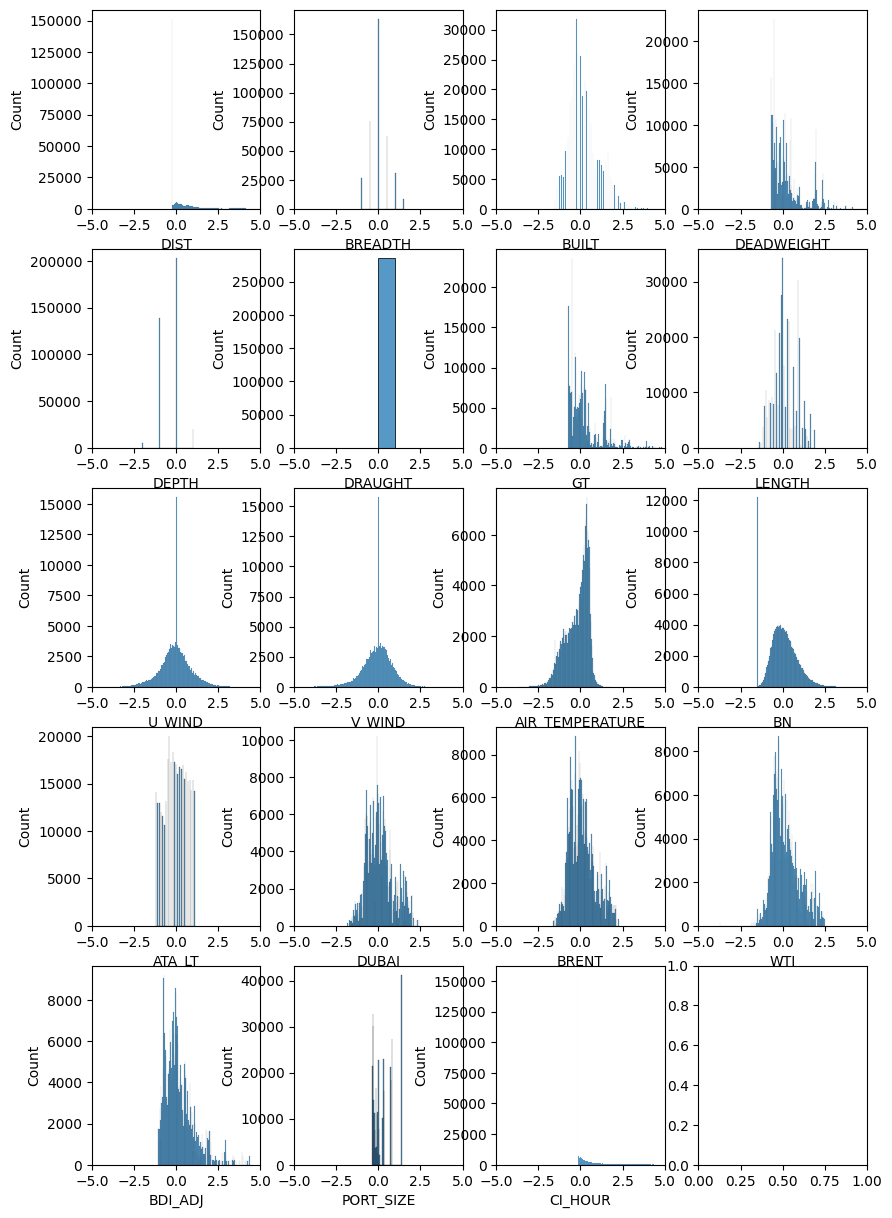

In [24]:
fig, ax = plt.subplots(5, 4)
fig.set_size_inches((10, 15))
k = 0
for i in range(0, 5):
    for j in range(0, 4):
        sns.histplot(train_robust[num_columns[k]], ax=ax[i, j]).set(xlim=(-5, 5))
        k += 1
        if k == 19:
            break

In [9]:
# StandardScaler 스케일링 (수치형 컬럼에 대해서만)

from sklearn.preprocessing import StandardScaler

stdscaler = StandardScaler()
train_std = stdscaler.fit_transform(train_num)

train_std = pd.DataFrame(train_std, columns=num_columns)
train_std.head()

,DIST,BREADTH,BUILT,DEADWEIGHT,DEPTH,DRAUGHT,GT,LENGTH,U_WIND,V_WIND,AIR_TEMPERATURE,BN,ATA_LT,DUBAI,BRENT,WTI,BDI_ADJ,PORT_SIZE,CI_HOUR
0,0.369562,-0.050216,1.882557,0.149643,0.582678,-0.236240,-0.069868,0.196205,0.130006,1.079744,-0.305060,0.017527,0.024391,-1.124647,-1.162591,-1.078481,0.080406,0.935024,-0.344885
1,1.420709,-0.050216,0.036066,-0.404176,0.582678,-0.236240,-0.336965,0.196205,-0.850414,-1.728746,0.579070,1.140496,-0.276557,0.095435,-0.143298,-0.187563,1.002484,0.880051,-0.262281
2,2.301102,1.775030,-1.100236,0.808877,0.582678,-0.236240,1.400439,1.250678,0.088412,0.070401,-0.973299,-1.950437,0.325340,-0.011178,-0.055617,-0.303896,-1.008252,1.033597,0.216623
3,-0.625046,-1.875462,2.592745,-0.977033,-1.071032,-2.410147,-1.033962,-1.780932,1.377813,-1.886706,0.332336,1.432129,-0.727980,-1.076360,-1.163067,-1.071210,-0.241417,-0.963325,-0.362756
4,-0.339842,-0.050216,-0.674123,-0.566231,-1.071032,-0.236240,-0.560818,-0.331032,0.658838,0.688858,0.404300,-0.259870,0.325340,1.191215,1.243398,1.206981,-0.325195,-0.811346,0.200225


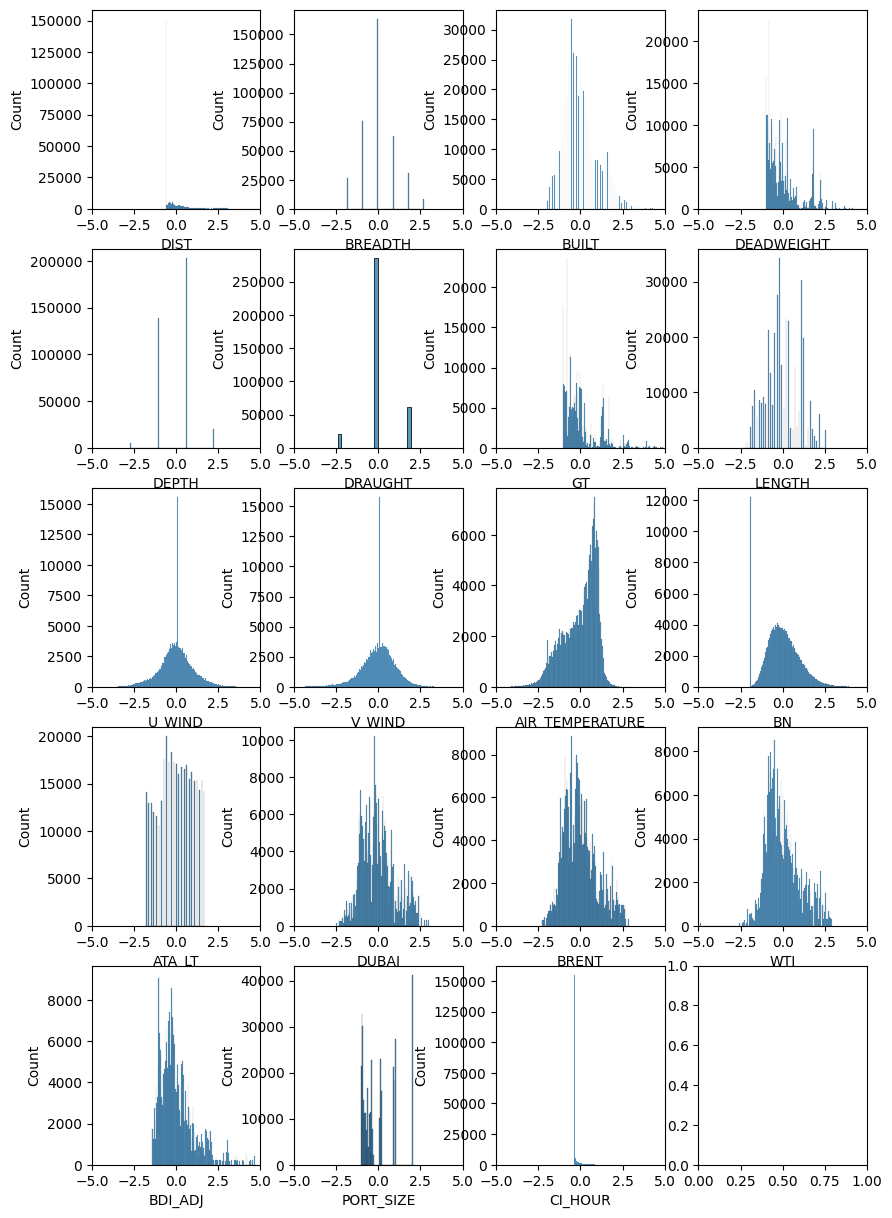

In [25]:
fig, ax = plt.subplots(5, 4)
fig.set_size_inches((10, 15))
k = 0
for i in range(0, 5):
    for j in range(0, 4):
        sns.histplot(train_std[num_columns[k]], ax=ax[i, j]).set(xlim=(-5, 5))
        k += 1
        if k == 19:
            break

### DIST, DEADWEIGHT, BDI_ADJ log 변환 적용하기

/Users/minju/.pyenv/versions/3.11.4/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Axes: xlabel='BDI_ADJ', ylabel='Count'>

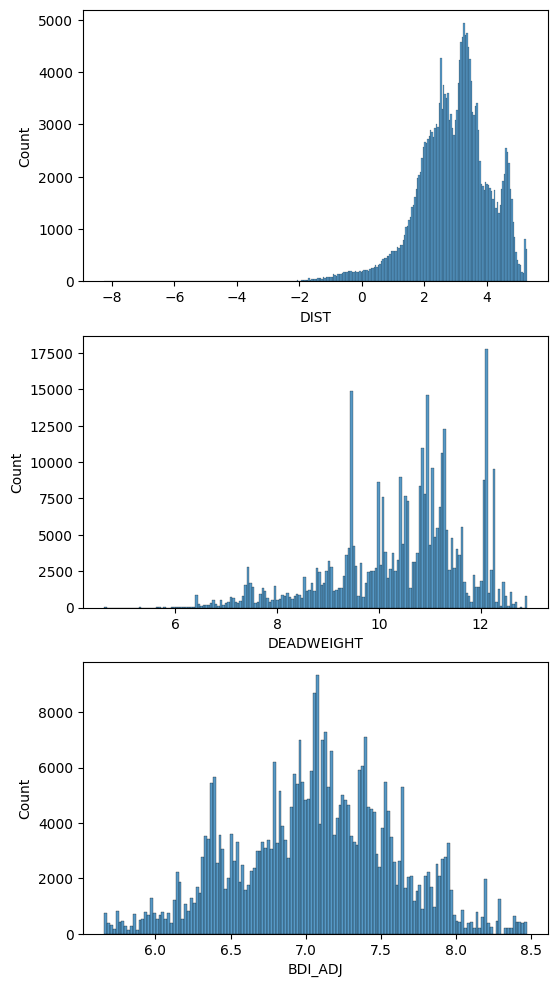

In [18]:
import seaborn as sns
fig, ax = plt.subplots(3, 1, figsize=(6, 12))

sns.histplot(np.log(train['DIST']), ax=ax[0])
sns.histplot(np.log(train['DEADWEIGHT']), ax=ax[1])
sns.histplot(np.log(train['BDI_ADJ']), ax=ax[2])

In [19]:
train['ATA'] = pd.to_datetime(train['ATA'])

# 년기준 일 평균 CI_HOUR
train['day_of_year'] = train['ATA'].dt.dayofyear
ci_hour_by_day_of_year = train.groupby('day_of_year')['CI_HOUR'].mean()
# 년기준 시간평균 CI_HOUR
train['hour_of_year'] = train['ATA'].dt.hour + (train['ATA'].dt.dayofyear - 1) * 24
ci_hour_by_hour_of_year = train.groupby('hour_of_year')['CI_HOUR'].mean()

# 년기준 월평균 CI_HOUR

train['month'] = train['ATA'].dt.month
ci_hour_by_month = train.groupby('month')['CI_HOUR'].mean()

# 일기준 시간 평균 CI_HOUR
train['hour'] = train['ATA'].dt.hour
ci_hour_by_hour = train.groupby('hour')['CI_HOUR'].mean()

# 월기준 시간 평균 CI_HOUR
train['day'] = train['ATA'].dt.day
ci_hour_by_day = train.groupby('day')['CI_HOUR'].mean()


Text(0, 0.5, 'Mean CI_HOUR')

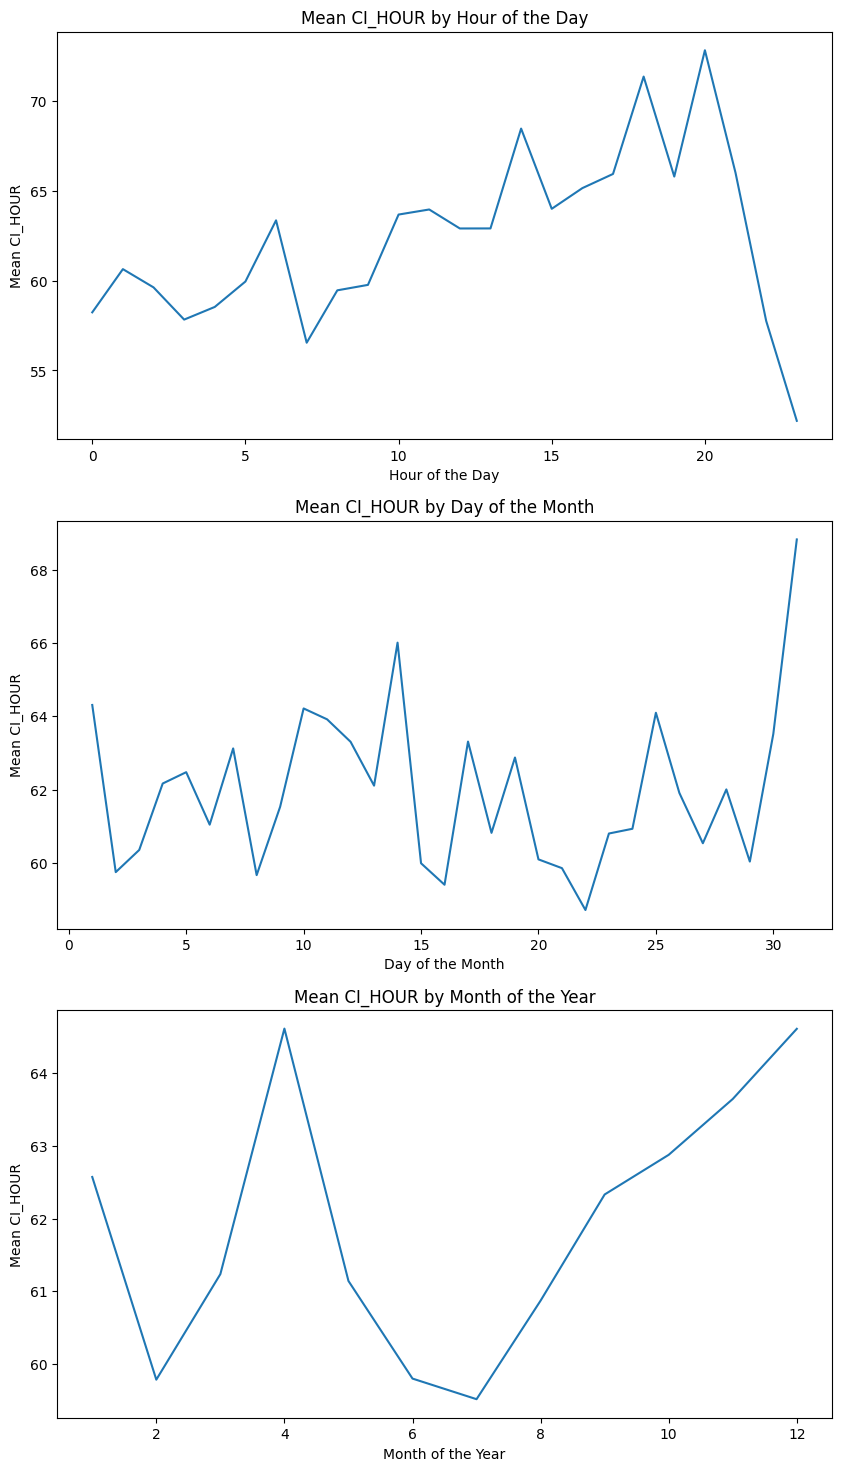

In [20]:
fig, axs = plt.subplots(3, 1, figsize=(10, 18))

# Plot mean CI_HOUR by hour of the day
sns.lineplot(x=ci_hour_by_hour.index, y=ci_hour_by_hour.values, ax=axs[0])
axs[0].set_title('Mean CI_HOUR by Hour of the Day')
axs[0].set_xlabel('Hour of the Day')
axs[0].set_ylabel('Mean CI_HOUR')

# Plot mean CI_HOUR by day of the month
sns.lineplot(x=ci_hour_by_day.index, y=ci_hour_by_day.values, ax=axs[1])
axs[1].set_title('Mean CI_HOUR by Day of the Month')
axs[1].set_xlabel('Day of the Month')
axs[1].set_ylabel('Mean CI_HOUR')

# Plot mean CI_HOUR by Month of the Year
sns.lineplot(x=ci_hour_by_month.index, y=ci_hour_by_month.values, ax=axs[2])
axs[2].set_title('Mean CI_HOUR by Month of the Year')
axs[2].set_xlabel('Month of the Year')
axs[2].set_ylabel('Mean CI_HOUR')